<a href="https://colab.research.google.com/github/Ajitesh-Gupta/TSA-LAB-1BM22AI162/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 4
i. Different forecasting techniques like Simple Exponential
Smoothing (SES), Simple Moving Average (SMA) & Holt-Winters
Smoothing.<br>
ii. Calculate the evaluation metrics such as Mean Absolute Error
(MAE), Mean Squared Error (MSE), and Root Mean Squared
Error (RMSE) for each forecasting technique.<br>
iii. Identify the trends and seasonal patterns for the above
forecasting techniques for the given dataset.

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data = df['Passengers']

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SES Metrics: {'MAE': 81.44827543044913, 'MSE': 8673.930949885269, 'RMSE': np.float64(93.13394091245827)}
SMA Metrics: {'MAE': 62.34482758620689, 'MSE': 6217.777777777777, 'RMSE': np.float64(78.85288693369303)}
HW Metrics: {'MAE': 67.2523414765224, 'MSE': 6104.525257126512, 'RMSE': np.float64(78.13146137841345)}


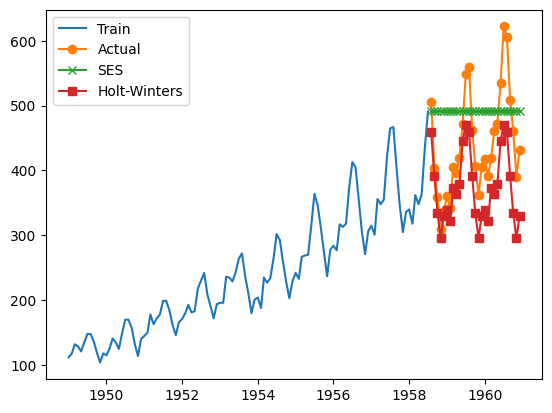

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# i. Different forecasting techniques

# Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train).fit()
ses_pred = ses_model.forecast(len(test))

# Simple Moving Average (SMA)
window = 3
sma_pred = train.rolling(window=window).mean().iloc[-1]
sma_forecast = pd.Series([sma_pred] * len(test), index=test.index)

# Holt-Winters Smoothing
hw_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
hw_pred = hw_model.forecast(len(test))

# ii. Calculate evaluation metrics
def calc_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

print("SES Metrics:", calc_metrics(test, ses_pred))
print("SMA Metrics:", calc_metrics(test, sma_forecast))
print("HW Metrics:", calc_metrics(test, hw_pred))

# iii. Identify trends and seasonal patterns
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, ses_pred, label='SES', marker='x')
plt.plot(test.index, hw_pred, label='Holt-Winters', marker='s')
plt.legend()
plt.show()